### The Unsupervised Clustering

*  Clustering is a Machine Learning technique that involves the grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features. Clustering is a method of unsupervised learning and is a common technique for statistical data analysis used in many fields.



---
Useful links: [K-Means](https://towardsdatascience.com/k-means-clustering-8e1e64c1561c), [Clustering Algorithms](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68), [Advanced Clustering](https://towardsdatascience.com/clustering-for-data-nerds-ebbfb7ed4090)



In [ ]:
import matplotlib.pyplot                     as plt
import numpy                                 as np
import pandas                                as pd
import seaborn                               as sns
                                 
from sklearn.cluster                         import KMeans
from sklearn.naive_bayes                     import MultinomialNB
from sklearn.feature_extraction.text         import CountVectorizer
from collections                             import Counter
from sklearn.model_selection                 import train_test_split
from sklearn.feature_extraction.text         import TfidfTransformer
from IPython.display                         import Image, display
from IPython.core.display                    import HTML
from sklearn.feature_extraction.text         import TfidfVectorizer
from sklearn.decomposition                   import PCA
from sklearn.preprocessing                   import normalize
from sklearn.metrics                         import pairwise_distances
from sklearn.metrics                         import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline                        import Pipeline
from sklearn.metrics                         import confusion_matrix



%matplotlib inline

In [ ]:
dataset = pd.read_csv("spam.csv", error_bad_lines=False, engine="python")
dataset = dataset.rename({'v1': 'Class', 'v2': 'Narrative'}, axis=1)
dataset =  dataset[['Class','Narrative']]
dataset

,Class,Narrative
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


* Can we just give our algorithm a bunch of text data and expect anything to happen? NO THE COMPUTER IS NOT A GINIE. Algorithms can't understand text data so we need to transform the data into numbers so that the model can understand. 

* If we represent the text in each email as a vector of numbers then our algorithm will be able to understand this and proceed accordingly. 

* What we will be doing is transforming the text in the body of each email into a vector of numbers using Term Frequency-Inverse Document Frequency or TF-IDF (for more information about TF-IDF click [here](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)).

In [ ]:
narrative = dataset['Narrative']

#Added min_df and max_df
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english', min_df = 0.02, max_df = 0.98)
tf_idf = tf_idf_vectorizor.fit_transform(narrative)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()
#print(tf_idf_array)
analise = pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names())
Lenght = dataset['Narrative'].str.len()
Digits = dataset['Narrative'].str.replace(r'\D+', '').str.len()
upperCase = dataset['Narrative'].str.count("[A-Z][a-z]*")
analise['Lenght'] = Lenght
analise['UpperCase'] = upperCase
analise['Digits'] = Digits
analise

,come,da,day,did,don,dont,free,going,good,got,gt,hi,home,just,know,later,like,ll,lor,love,lt,mobile,need,new,ok,phone,reply,send,sorry,stop,tell,text,think,time,today,txt,ur,want,Lenght,UpperCase,Digits
0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,111,3,0
1,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,29,2,0
2,0.0,0.0,0.0,0.00000,0.000000,0.0,0.550767,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.586711,0.000000,0.0,0.0,0.593655,0.0,0.0,155,10,25
3,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,49,2,0
4,0.0,0.0,0.0,0.00000,0.698322,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.715783,0.0,0.0,0.000000,0.0,0.0,61,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.0,0.0,160,9,21
5568,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.706167,0.0,0.0,0.0,0.0,0.708045,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,37,1,0
5569,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,57,2,0
5570,0.0,0.0,0.0,0.63313,0.000000,0.0,0.547048,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.547617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,125,2,0


## KMeans


* HOW IT WORKS
 
  1. First select a number of classes/groups to use.

  2. Each data point is classified by computing the distance between that point and each group center, and then classifying the point to be in the group whose center is closest to it.

  ![Euclidean](https://miro.medium.com/max/890/1*UVJKdowZ9CHxvrII1IYolw.png)

  3. Based on these classified points, we recompute the group center by taking the mean of all the vectors in the group.
  4. Repeat these steps for a set number of iterations or until the group centers don’t change much between iterations (converge).

* ADVANTAGES

    > It’s fast, as all we’re really doing is computing the distances between points and group centers; very few computations!

* DISADVANTAGES

   >  You have to select how many groups/classes there are. 
    
   >  K-means also starts with a random choice of cluster centers and therefore it may yield different clustering results on different runs of the algorithm (not consistent). 
    

![KMeans](https://miro.medium.com/max/960/1*KrcZK0xYgTa4qFrVr0fO2w.gif)

In [ ]:
#km = KMeans(n_clusters = 2)
km = KMeans(algorithm='elkan', max_iter=300, n_clusters = 2, n_init=30)
km

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
km.fit(analise)
predict = km.predict(analise)
predict

array([1, 0, 1, ..., 0, 1, 0], dtype=int32)

In [ ]:
dataset['Cluster'] = predict
dataset['Cluster'].value_counts()

0    3818
1    1754
Name: Cluster, dtype: int64

In [ ]:
dataset['Class'].value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

* First let's assume that the values that were predicted are referring to the following classes:


> HAM  = 0

> SPAM = 1



In [ ]:
List =[]
i = 0
HAM_TP = 0

while  (i <= 5571):
  res = dataset.loc[i][2]
  if (res == 0):
    List.append("ham")
  else:
    List.append("spam")
  i=i+1

result_pred = pd.DataFrame (List,columns=['Predicted'])
actual_data = dataset['Class']



act = actual_data.to_numpy()

y_actu = pd.Series(act, name='Actual')
y_pred = pd.Series(List, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion


Predicted,ham,spam
Actual,,
ham,3745,1080
spam,73,674


This was a very bad result, lets try using exploratory data analysis to better understand what is going on here....

In [ ]:
#Cheking the results and if there is any bias.
#check = dataset[['Narrative','Cluster']]
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)  
#pd.set_option('display.width', 20000)
#pd.set_option('display.max_colwidth', -1)
#check

## Exploratory Data Analysis

1. String lenght
2. String Ponctuation
3. Most common words



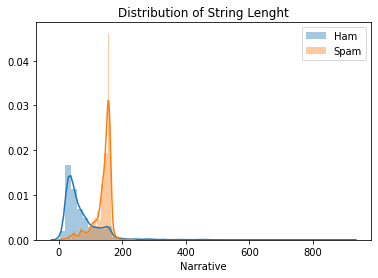

In [ ]:
hamLenght = dataset[dataset['Class'] == 'ham']['Narrative'].str.len()
spamLenght = dataset[dataset['Class'] == 'spam']['Narrative'].str.len()
sns.distplot(hamLenght, label='Ham')
sns.distplot(spamLenght, label='Spam')
plt.title('Distribution of String Lenght')
plt.legend()

Since it is VERY clear the difference between spam and ham, I am going to use it as a new feature to help develop the algorithm 

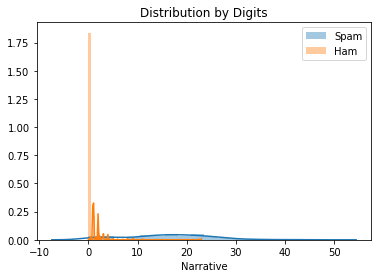

In [ ]:
hamD = dataset[dataset['Class'] == 'ham']['Narrative'].str.replace(r'\D+', '').str.len()
spamD = dataset[dataset['Class'] == 'spam']['Narrative'].str.replace(r'\D+', '').str.len()
sns.distplot(spamD, label='Spam')
sns.distplot(hamD, label='Ham')
plt.title('Distribution by Digits')
plt.legend()

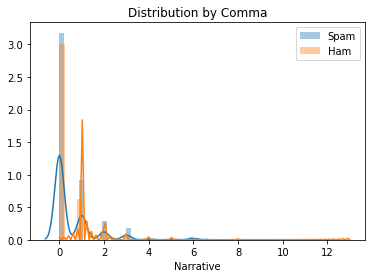

In [ ]:
spamC = dataset[dataset['Class'] == 'spam']['Narrative'].str.count(',')
hamC = dataset[dataset['Class'] == 'ham']['Narrative'].str.count(',')
sns.distplot(spamC, label='Spam')
sns.distplot(hamC, label='Ham')
plt.title('Distribution by Comma')
plt.legend()

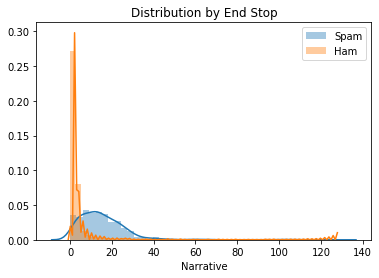

In [ ]:
spamP = dataset[dataset['Class'] == 'spam']['Narrative'].str.count("[A-Z][a-z]*")
hamP = dataset[dataset['Class'] == 'ham']['Narrative'].str.count("[A-Z][a-z]*")
sns.distplot(spamP, label='Spam')
sns.distplot(hamP, label='Ham')
plt.title('Distribution by End Stop')
plt.legend()

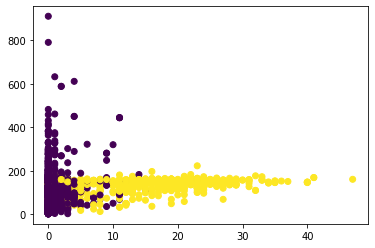

In [ ]:
Target = dataset['Class']

TargetList =[]
j = 0

while  (j <= 5571):
  res = dataset.loc[j][0]
  if (res == 'ham'):
    TargetList.append(0)
  else:
    TargetList.append(1)
  j=j+1


plt.scatter(Digits, Lenght, c=TargetList)
plt.show()

In [ ]:
df = pd.DataFrame()
df['Lenght'] = Lenght
df['Digits'] = Digits

km.fit(df)
predict = km.predict(df)
df['Predicted'] = predict
df

,Lenght,Digits,Predicted
0,111,0,1
1,29,0,0
2,155,25,1
3,49,0,0
4,61,0,0
...,...,...,...
5567,160,21,1
5568,37,0,0
5569,57,0,0
5570,125,0,1


In [ ]:
df['Predicted'].value_counts()

0    3817
1    1755
Name: Predicted, dtype: int64

In [ ]:
ListTry =[]
i = 0

while  (i <= 5571):
  res = df.loc[i][2]
  if (res == 0):
    ListTry.append("ham")
  else:
    ListTry.append("spam")
  i=i+1

result_pred = pd.DataFrame (ListTry,columns=['Predicted'])

actual_data = dataset['Class']


act = actual_data.to_numpy()

y_actu = pd.Series(act, name='Actual')
y_pred = pd.Series(ListTry, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,ham,spam
Actual,,
ham,3745,1080
spam,72,675
